> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. You will see some overlap in the initial tasks as the data is cleaned.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

We will be using the same San Francisco rent dataset as in Lab 4.  Some rentals are apartments, others are for homes, and there may be some other random properties for rent.  Each row represents one rental listing.

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library for dataframes.  Then `Matplotlib` and `Seaborn` for data visualization.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [5]:
# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [6]:
# Preview the first rows
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## Part 2: Inspecting Data Quality

### Instructions:
- Check for outliers or invalid data in key numeric variables like `price`, `sqft`, `beds`, or `baths`.  The concept of outliers will be covered more in week 6.  This week we will just look for outliers, but we won't take steps to remove them.     

In [7]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


### In Your Response:
- Do any numeric variables contain extreme or unusual values?
- Should those outlier values be removed?  Or are they valid rental properties?

### ✍️ Your Response: 🔧
1.
2.

The first extreme values that I notice are the minimums. There is a minumum price of 220, a min bed count of 0, and a min sqft of 80. It is not possible to have an apartment without a bedroom, so those outliers should be removed.

## Part 3: Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


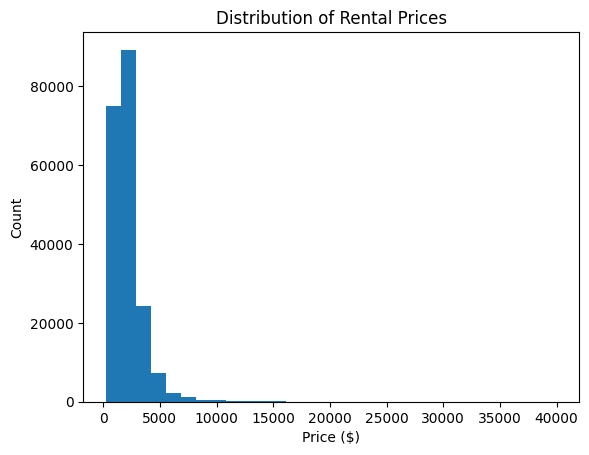

In [8]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

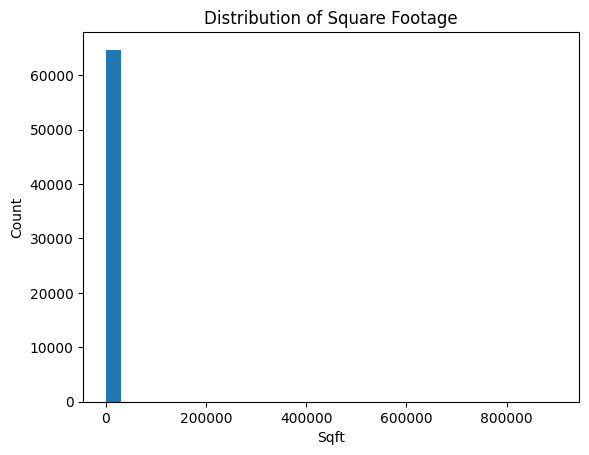

In [9]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


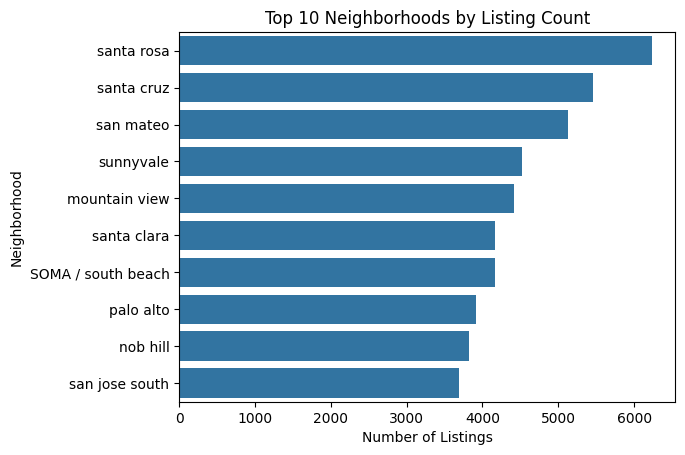

In [10]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

### In Your Response:

After creating each of the visuals, write 1–2 sentences explaining what you notice in each.


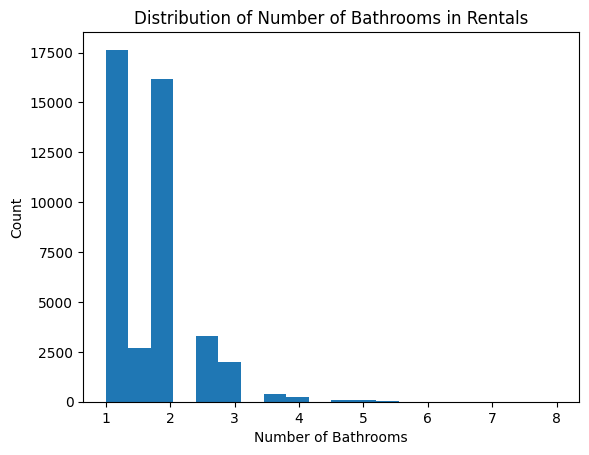

In [11]:
plt.figure()
plt.hist(df['baths'].dropna(), bins=20)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.title("Distribution of Number of Bathrooms in Rentals")
plt.show()

### ✍️ Visual 1 Response: 🔧
1. This histogram shows the distribution of baths in rental properties. Majority of properties have one to two bathrooms, while some have up to five and a half.

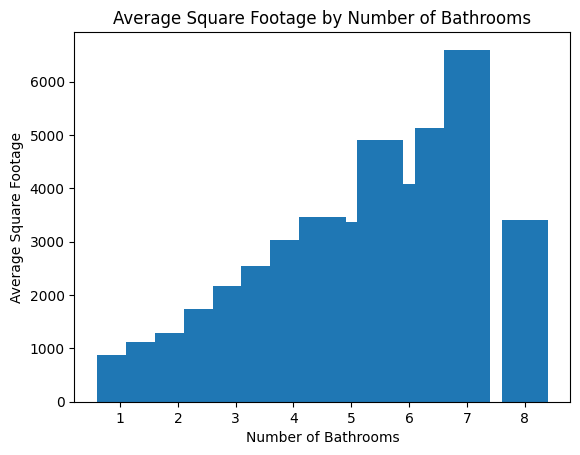

In [12]:
avg_sqft = (
    df.groupby('baths')['sqft']
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(avg_sqft['baths'], avg_sqft['sqft'])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Square Footage")
plt.title("Average Square Footage by Number of Bathrooms")
plt.show()

### ✍️ Visual 2 Response: 🔧
1.

This bar chart average square foot of the propery compared to the number of bathrooms. It is clear that as the number of bathrooms increases, so does the average square feet of the property.

## Part 4: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [15]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.450096,0.433553,0.074310
beds,0.450096,1.000000,0.651835,0.707235
baths,0.433553,0.651835,1.000000,0.645372
sqft,0.074310,0.707235,0.645372,1.000000


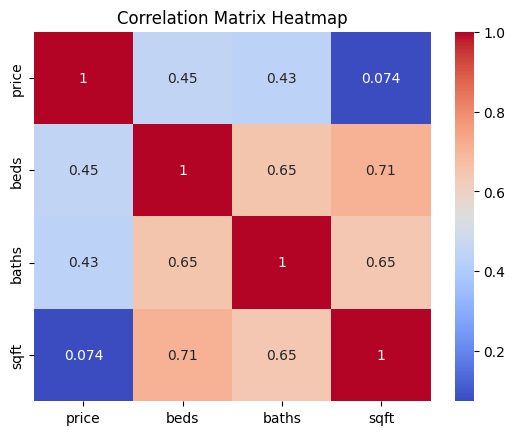

In [16]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

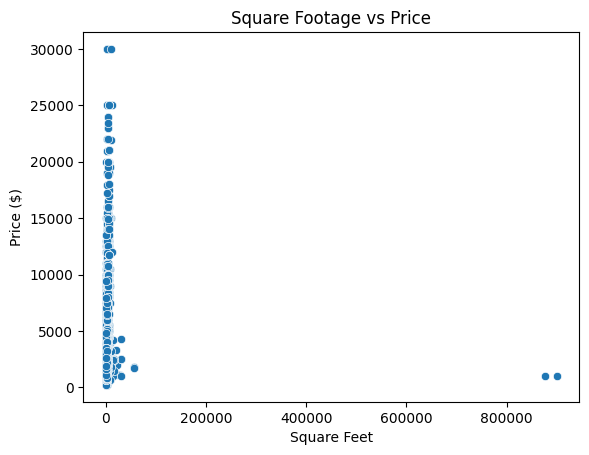

In [17]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

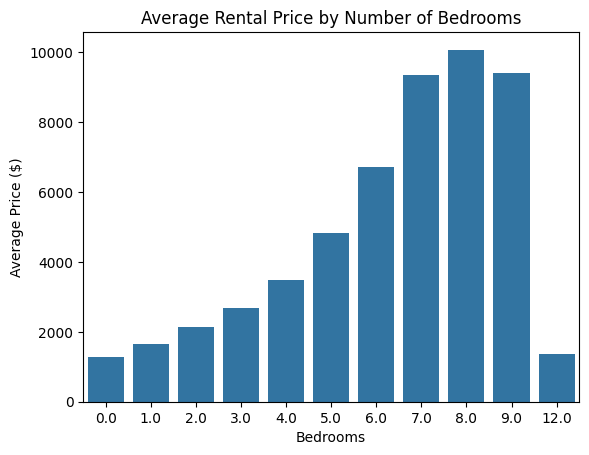

In [18]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

In [23]:
avg_price_neighborhood = (
    df.groupby('nhood')['price']
    .mean()
    .sort_values(ascending=False)
)

avg_price_neighborhood.head(5)

,price
nhood,
inverness,5310.000000
atherton,4536.010989
tiburon / belvedere,4265.346591
financial district,3958.161417
west portal / forest hills,3827.276119


### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.

### In Your Response:
1. What trends or outliers do you see?

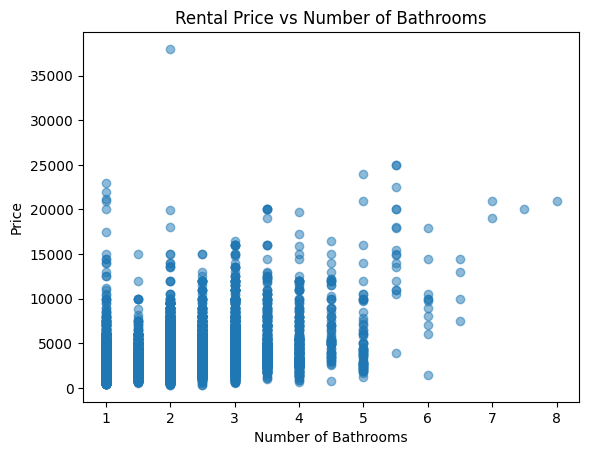

In [13]:
plt.figure()
plt.scatter(df['baths'], df['price'], alpha=0.5)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Rental Price vs Number of Bathrooms")
plt.show()

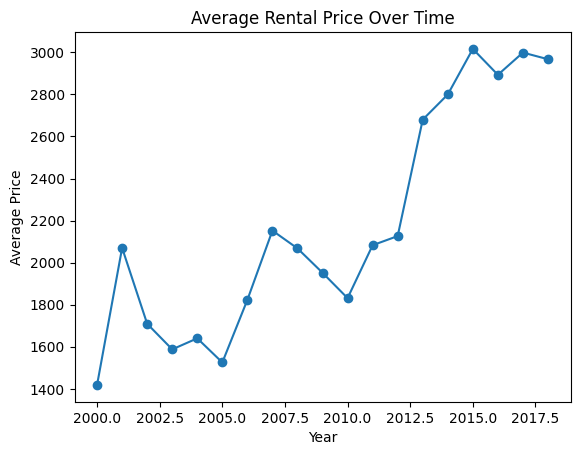

In [14]:
avg_price_year = (
    df.groupby('year')['price']
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(avg_price_year['year'], avg_price_year['price'], marker='o')
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Rental Price Over Time")
plt.show()

### ✍️ Your Response: 🔧
1. The scatterplot shows a few outliers in the data. We can see that there is one property that has 2 bathrooms and a price of over 35,000. We also see that there are a few properties with over 5 bathrooms. The average price over time shows an overall increase from 2000 to 2017. This shows an upward trend.

## 🔧  Part 5: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

### ✍️ Your Response: 🔧
1. Number of bathrooms and bedrooms are the two most strongly correlated variables to rental price. As number of bathrooms or bedrooms increases, so does the price.
2. Yes there are patterns in how sqft and bedrooms affect price. More bedrooms usually mean bigger properties. Bigger properties lead to higher prices. The correlation heat map shows that bedrooms and bathrooms have the strongest correlation to price.  
3. The highest prices for rental properties were in 2015. Prices have remained around this level up until 2017. There is no graph that shows which neighborhoods have the highest prices, so I created my own. According to this, Iverness has the highest price.
4. A graph that shows the neighborhood and the average price would be good to determine what neighborhoods are in your price range. Removing outliers would also make the graphs more reliable. You could also narrow down the data to help search for properties.


## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_05_eda.ipynb"